# Class 11: part 2 

NYU Tandon C4SUE @avigailvantu , April 2021

## Polygons, merging, more mapping features, and creating choropleth maps 

In this notebook we will be back to working with the NYT COVID-19 data that we worked with in the past few classes. 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon


## States boundries from the Census Buraeu 

Can be accessed here: 

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [12]:
#load geodataframe
states = gpd.read_file('cb_2018_us_state_500k')

In [13]:
states.head() 

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


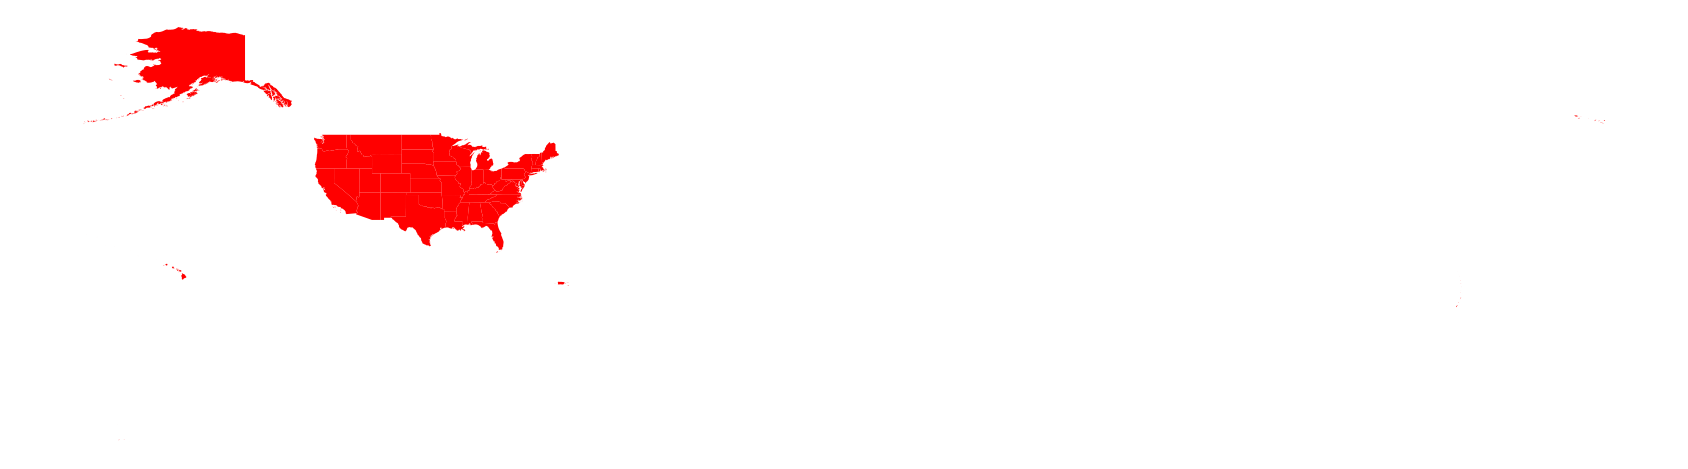

In [14]:
states.plot( color='red',legend=True,figsize=(30, 12),markersize=0.1)
plt.axis('off')
plt.show()

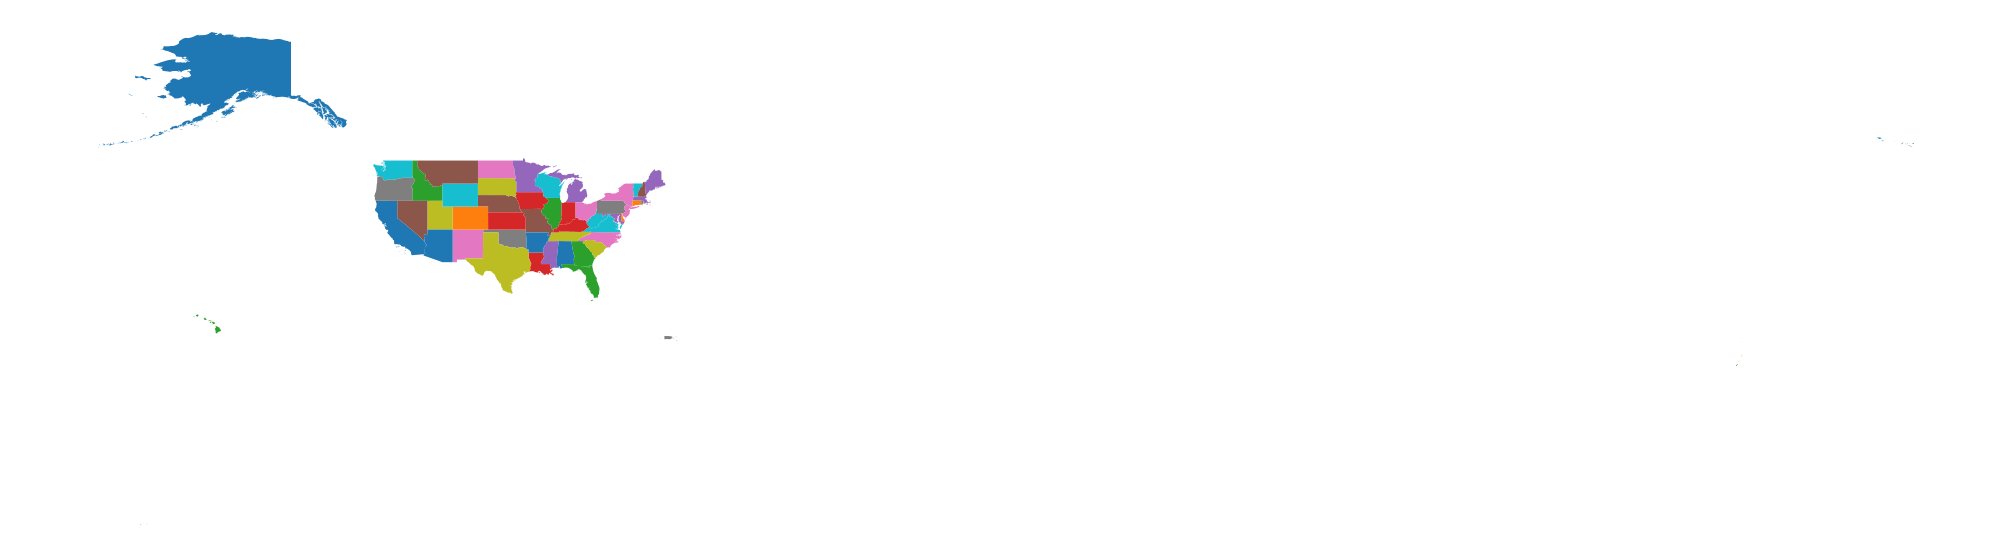

In [15]:
states.plot( column='NAME',legend=False,figsize=(40, 10),markersize=0.1)
plt.axis('off')
plt.show()

## COVID-19 data from the NYT 

my data is up to date as of April 18th 

https://github.com/nytimes/covid-19-data

In [16]:
#Load data

covidUS = pd.read_csv('us-states.csv')

In [17]:
covidUS.shape

(23059, 5)

In [18]:
#let's see the data  

covidUS.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [19]:
covidUS.tail()

,date,state,fips,cases,deaths
23054,2021-04-25,Virginia,51,654210,10691
23055,2021-04-25,Washington,53,397006,5478
23056,2021-04-25,West Virginia,54,151382,2821
23057,2021-04-25,Wisconsin,55,656668,7473
23058,2021-04-25,Wyoming,56,57696,705


# Create a DataFrame for April 18th, the last day in data

In [20]:
#filter as of the last day in the data

april2521 = covidUS[covidUS['date']== '2021-04-25']

In [21]:
#check out the new filtered data
april2521.head()

,date,state,fips,cases,deaths
23004,2021-04-25,Alabama,1,526131,10851
23005,2021-04-25,Alaska,2,66518,318
23006,2021-04-25,Arizona,4,858737,17268
23007,2021-04-25,Arkansas,5,334706,5718
23008,2021-04-25,California,6,3731677,61434


# Time to merge data: 

We will merge data so that we are able to have the covid-19 data merged with the US countries boundries. 

The merge function works the same for DataFrame and GeoDataFrames. Basically, it joins two datasets based on a mutual attribute (column). Because our data is state based, we will merge based on that column. In geographical data, we will join the data without geogrpahical attirbutes (covid 19 for us), into the layer with the geomtery column (state shapfile). 


    

In [22]:
#copy state column as a prep for merging datasets --> both need to be the same name
states['state'] = states['NAME']

In [23]:
# time to merge: 

states = states.merge(april2521, on='state')

In [24]:
#Check out merged data:

states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,2021-04-25,28,310349,7175
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,2021-04-25,37,963886,12553
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,2021-04-25,40,446550,6716
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2021-04-25,51,654210,10691
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,2021-04-25,54,151382,2821


## Visualize the merged data: 



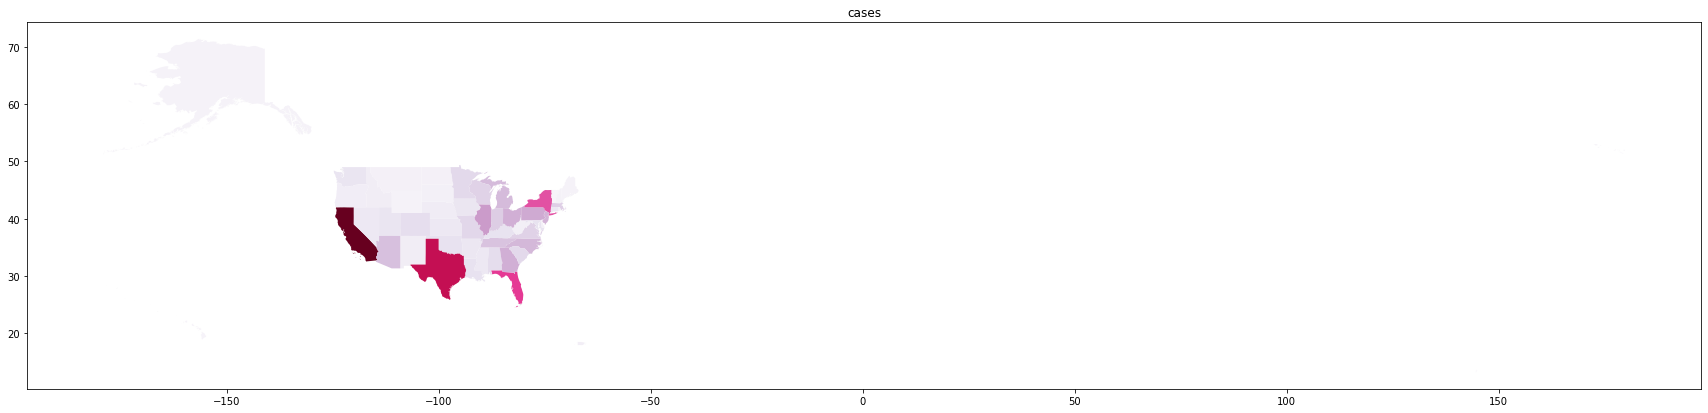

In [30]:
states.plot(column='cases',figsize=(30, 10),cmap='PuRd')

plt.title('cases')
plt.show()


## Set a map x and y range

Often the deafult of the map that will be plotted will not show the map in its ideal range. For example: 


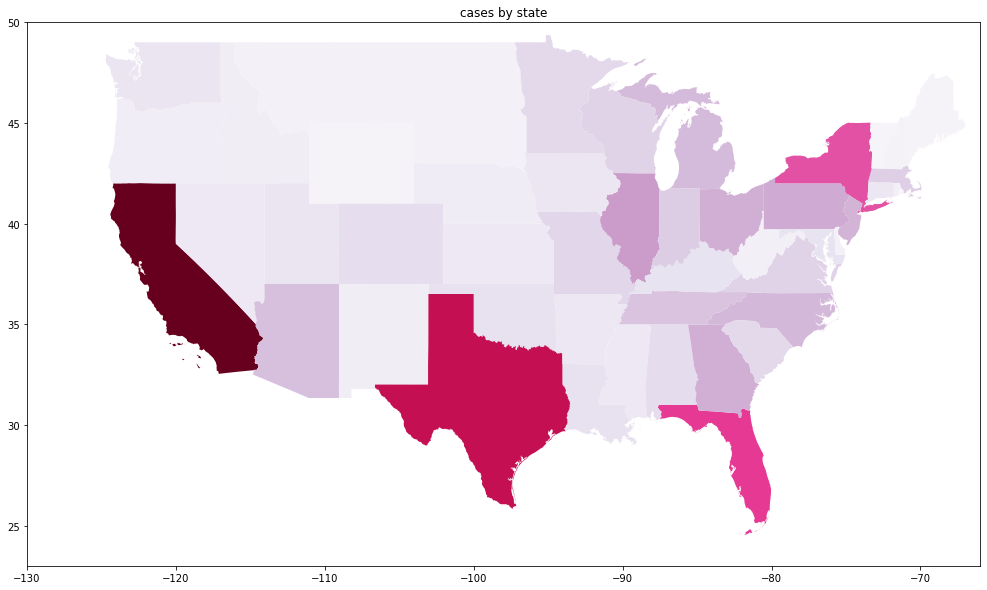

In [26]:
states.plot(column='cases',figsize=(60, 10),cmap='PuRd')

plt.title('cases by state')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

## And final touches-->

- remove axis, 
- adjust title + its size & color 
- add legend


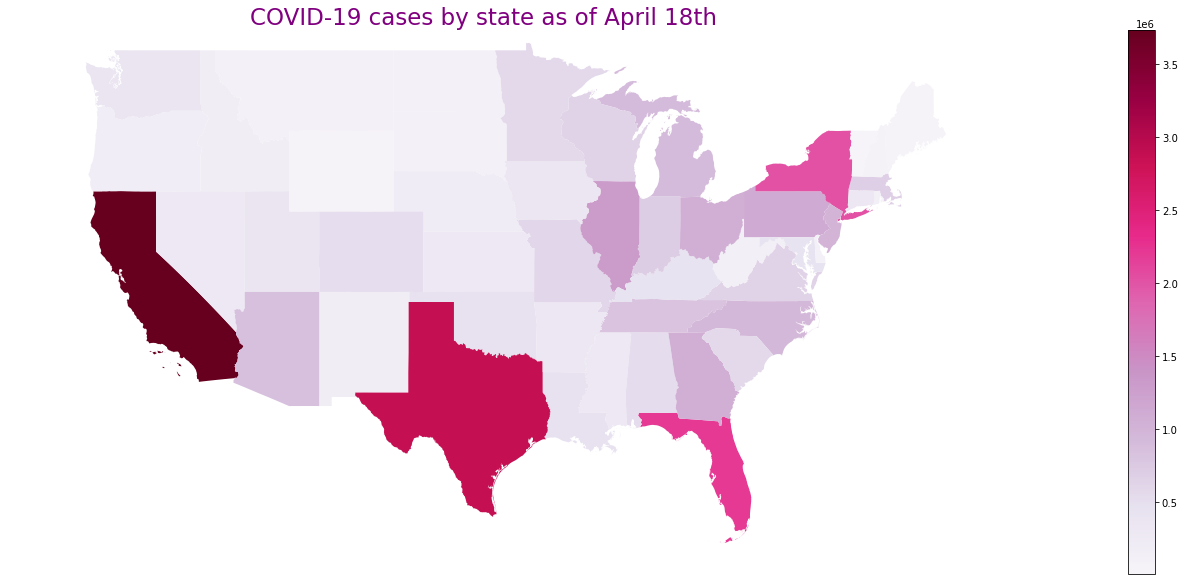

In [27]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

# Le'ts zoom into the the tri-state area 

To do so first let's plot the axis again so we can see the range of the coordinates we want to zoom into.

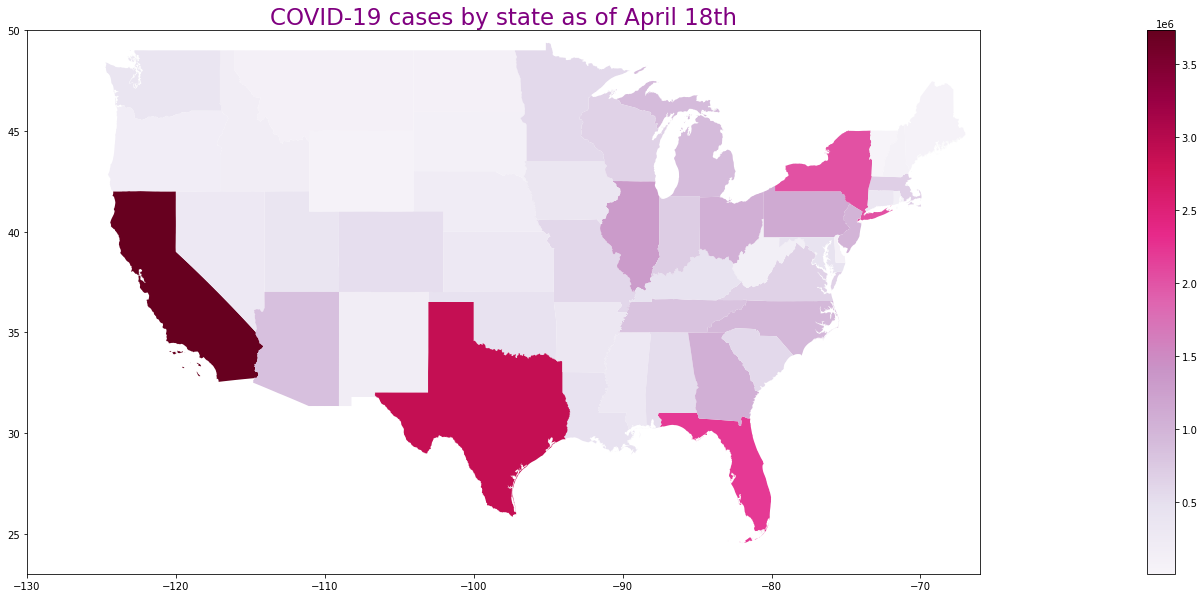

In [28]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
#this is the y range
plt.ylim((23,50))
#this is the x range 
plt.xlim((-130,-66))
plt.show()

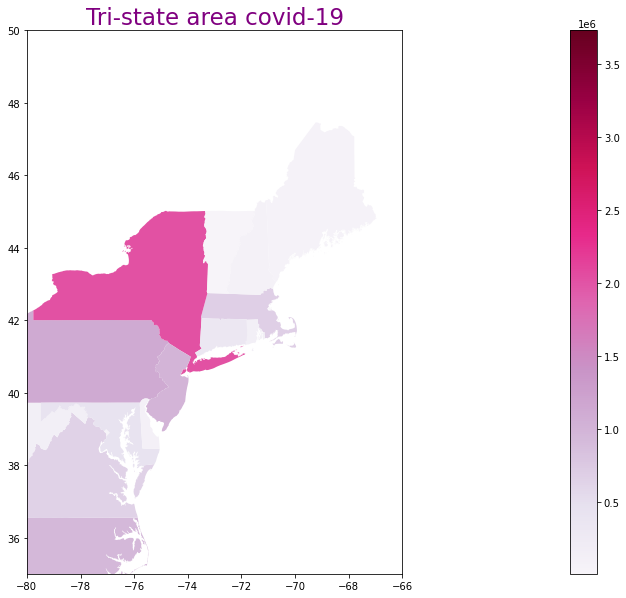

In [29]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('Tri-state area covid-19', fontsize=23, color ='purple')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

# Now Let's Plot Multiple Plots Side-By-Side 

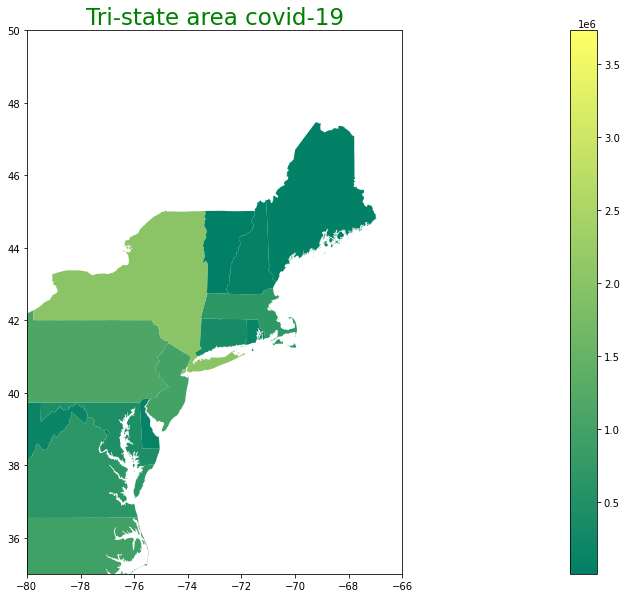

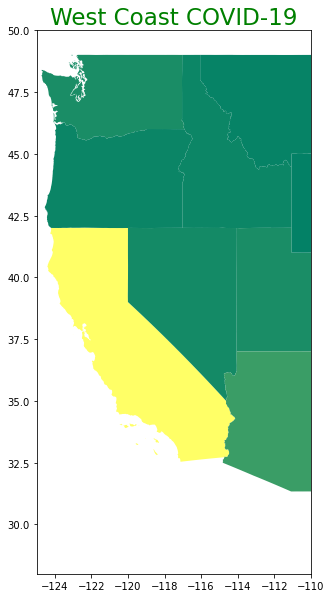

In [31]:
#1.tri-state area 
ax1 = states.plot(column='cases',legend=True, figsize=(60, 10),cmap='summer') 
plt.title('Tri-state area covid-19', fontsize=23, color ='green')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

#2. west coast 
ax2 = states.plot(column='cases', figsize=(60, 10),cmap='summer')
plt.title('West Coast COVID-19', fontsize=23, color ='green')
plt.ylim((28,50))
plt.xlim((-125,-110))
plt.show()



# Task 1: 

Can you plot 2 plots of the cases in the us:
1. For April 1st, 2020
2. For April 1st, 2021 

* What are some of the trends you found? Which trends have remained the same and which have changed in this past year? 

# Task 2: 

Can you visualize one state's cases only? 

# Task 3: 

using the below counties data, can you merge the data with NYS's counties and visualize the number of cases on April 25th 2021? 

If so, what were the steps that led you there? If not, what are some of the issues you faced and the techniques you looked into? 

Suggested places to look for counties shapefile:
1. https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-new-york-current-county-subdivision-state-based 
2. https://cugir.library.cornell.edu/catalog/cugir-007865 


In [ ]:
counties = pd.read_csv('us-counties.csv')
counties[counties['state']=='New York']

In [ ]:
counties[counties['date']=='2021-03-01']

In [ ]:
#your code here... 